# Boston Housing Data Project

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Exploring the Housing Dataset

Source: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
</pre>

In [6]:
# Importing data indo panda dataframe 
data = pd.read_csv('housing.data.txt', header=None, sep='\s+')

# Giving column name 
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
bh_data=data
bh_data.head()
bh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


## Exploring the important characteristics of the dataset

In [33]:
print data.corr()

bf_corr = data.corr()
# The target MEDV is the last column, then remove corr with itself
corr_with_target = bf_corr.ix[-1][:-1]
# attributes sorted from the most predictive with a positive relation 
corr_with_target.sort_values(ascending=False)


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

# Visualizing the dataset

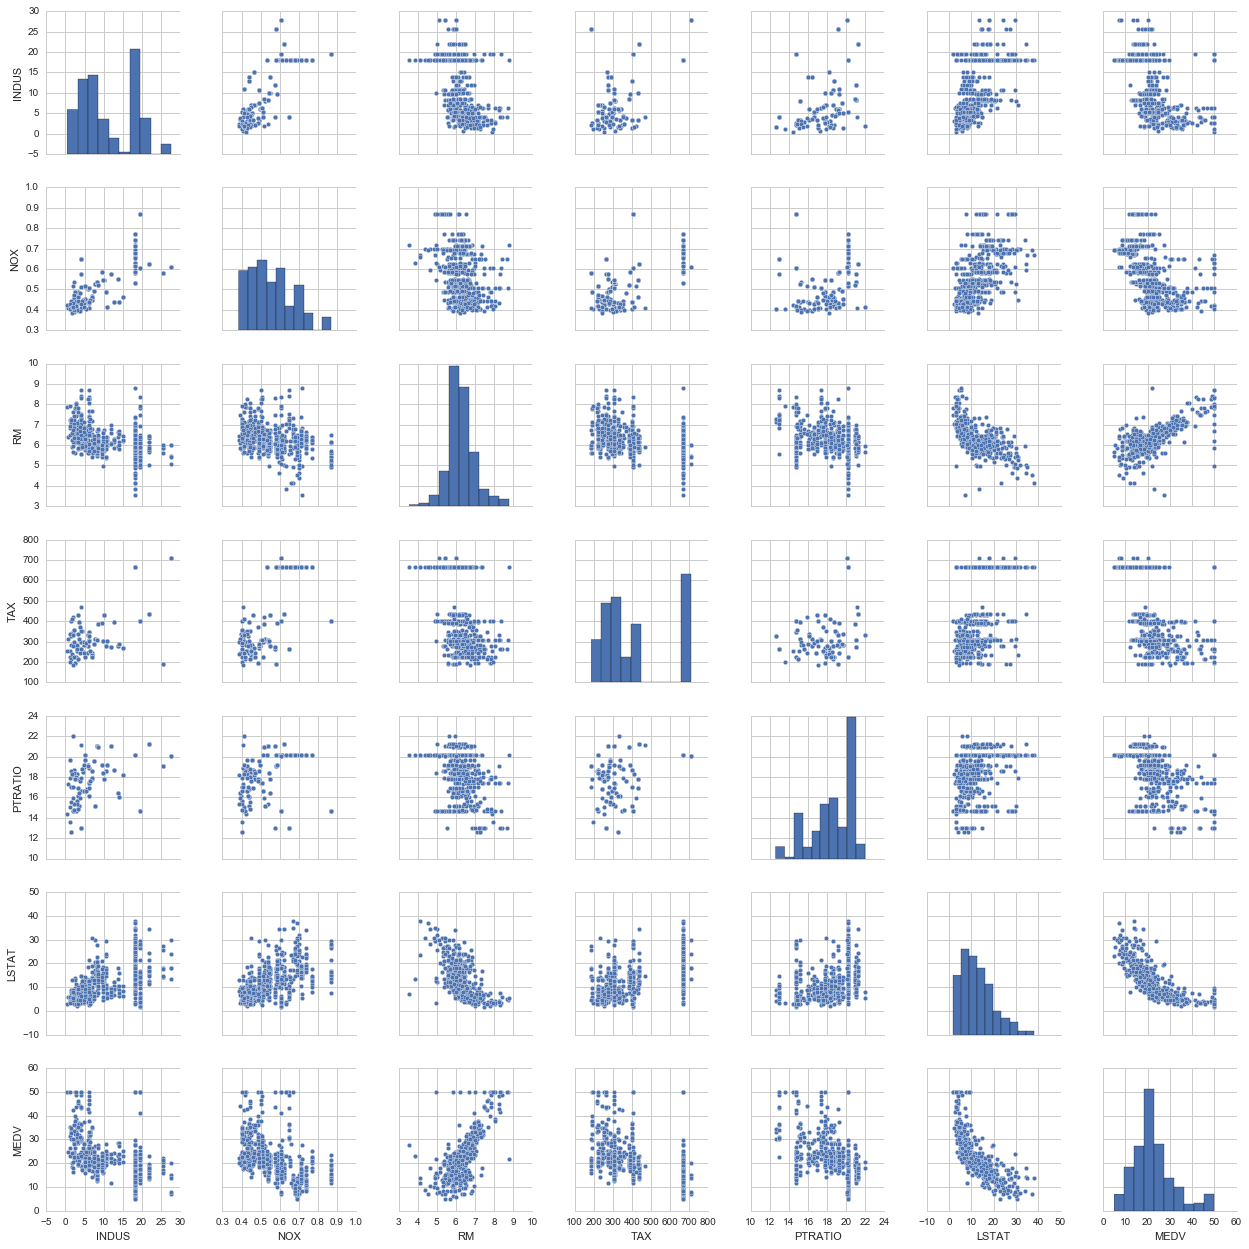

In [8]:
colls = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

sns.set(style='whitegrid', context='notebook')

sns.pairplot(bh_data[colls], size=2.5)
plt.tight_layout()
plt.show()

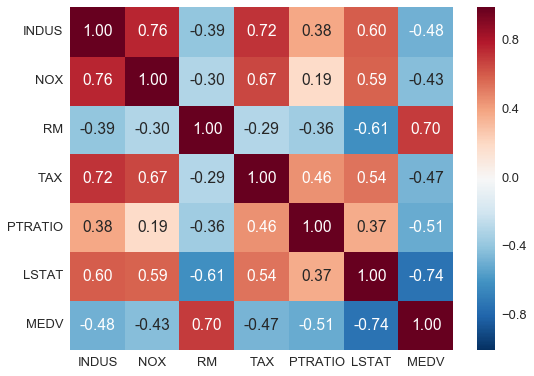

In [9]:

cm = bh_data[colls].corr()
sns.set(font_scale=1.3)


hm = sns.heatmap(cm, annot=True, fmt='.2f')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.cross_validation import train_test_split

bh_data=bh_data[colls]
print bh_data.shape
# Separate the data into training and test:
train, test = train_test_split(bh_data, test_size=0.20, random_state=42)
train.info()

(506, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 7 columns):
INDUS      404 non-null float64
NOX        404 non-null float64
RM         404 non-null float64
TAX        404 non-null float64
PTRATIO    404 non-null float64
LSTAT      404 non-null float64
MEDV       404 non-null float64
dtypes: float64(7)
memory usage: 25.2 KB


In [11]:
import itertools
import statsmodels.formula.api as sm


# List of all featrues that we will use to preict the median value of the house 

all_feats = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']


def create_r_style_formula(response, feats):
    """
    Given response variable name ('response'), existing features ('feats'),
    creates and returns an R-style formula string of the form
    
        response ~ feat1 + feat2 + ... + featM,
        
    where M is the number of elements in feats. 
    """
    formula = "%s ~ " % response
    for ft in feats[:-1]:
        formula += "%s + " % ft
    formula += feats[-1]
    return formula

def best_select(model_size, feats, df, response='MEDV'):
    """
    Given model size between 1 and M = len(feats), finds the 
    model of that size with best R^2 score and returns a tuple
    containing:
    
        referece to the model, 
        list of features selected, 
        R^2 score obtained,
        reference to result object
    
    """
    # For keeping track of the best features:
    best_r2 = -1
    best_feats = None
    best_model = None
    best_result = None
    
    ### YOUR CODE STARTS HERE ###
    
    # Try all subsets of features of size model_size:
    for sub_feats in itertools.combinations(feats, model_size):
        model = sm.ols(formula=create_r_style_formula(response, sub_feats), data=df)
        result = model.fit()
        # Keep track of best result:
        if result.rsquared > best_r2:
            best_r2 = result.rsquared
            best_feats = sub_feats
            best_model = model
            best_result = result
            
    ### YOUR CODE ENDS HERE ###
    
    # Return the tuple of what should now contain the best featuers:
    return (best_model, best_feats, best_r2, best_result)

# For each set of selected features, we retain the model. Model with N features should
# be stored in models[N].
models = {}
# For each set of selected features, we retain the results of training the model:
results = {}
# For each number of features considered, we keep a list of the selected features:
feats = {}
# For each number of features considered, we retain the best (highest) R^2 score:
r2s = {}

### YOUR CODE STARTS HERE ###
for N in range(1,len(all_feats)+1):
    models[N], feats[N], r2s[N], results[N] = best_select(N, all_feats[:], train)
### YOUR CODE ENDS HERE ###


In [12]:
for N in range(1,len(all_feats)+1):
    print results[N].params
    print ""

Intercept    34.836950
LSTAT        -0.966531
dtype: float64

Intercept   -3.841177
RM           5.465099
LSTAT       -0.632499
dtype: float64

Intercept    14.588099
RM            4.933118
PTRATIO      -0.867095
LSTAT        -0.567126
dtype: float64

Intercept    13.542811
RM            5.022573
TAX          -0.002919
PTRATIO      -0.799648
LSTAT        -0.533072
dtype: float64

Intercept    13.047503
INDUS         0.094568
RM            5.104018
TAX          -0.005056
PTRATIO      -0.793570
LSTAT        -0.557637
dtype: float64

Intercept    14.375979
INDUS         0.121918
NOX          -2.921142
RM            5.138565
TAX          -0.004554
PTRATIO      -0.824986
LSTAT        -0.545490
dtype: float64



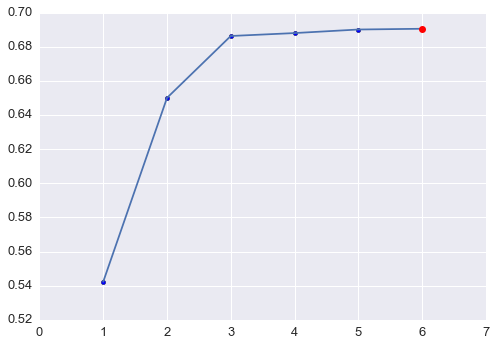

In [13]:
# Plotting R^2 values:
plt.plot( range(1,len(all_feats)+1), [r2s[N] for N in range(1,len(all_feats)+1)] )
plt.scatter( range(1,len(all_feats)+1), [r2s[N] for N in range(1,len(all_feats)+1)] )

r2s_values=[r2s[N] for N in range(1,len(all_feats)+1)] 
r2s_max=np.max(r2s_values)
r2s_max_index=np.argmax(r2s_values) +1 #Index start with 0, so add 1

plt.plot(r2s_max_index, r2s_max, 'o', c='red')

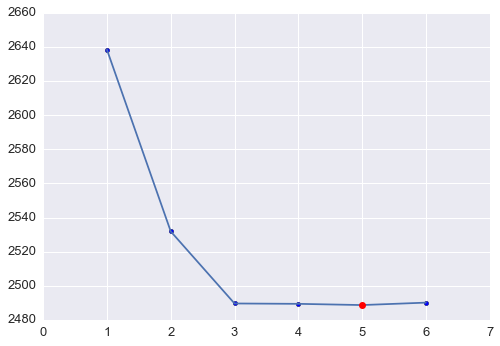

In [14]:
# Plotting AIC values:
plt.plot( range(1,len(all_feats)+1), [results[N].aic for N in range(1,len(all_feats)+1)] )
plt.scatter( range(1,len(all_feats)+1), [results[N].aic for N in range(1,len(all_feats)+1)] )

aic_values=[results[N].aic for N in range(1,len(all_feats)+1)] 
aic_max=np.min(aic_values)
aic_max_index=np.argmin(aic_values) +1 #Index start with 0, so add 1

plt.plot(aic_max_index, aic_max, 'o', c='red')

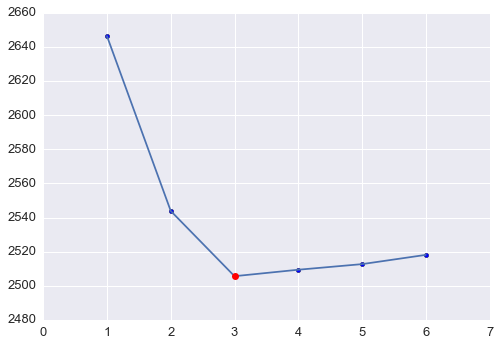

In [15]:
# Plotting BIC values:
plt.plot( range(1,len(all_feats)+1), [results[N].bic for N in range(1,len(all_feats)+1)] )
plt.scatter( range(1,len(all_feats)+1), [results[N].bic for N in range(1,len(all_feats)+1)] )

bic_values=[results[N].bic for N in range(1,len(all_feats)+1)] 
bic_max=np.min(bic_values)
bic_max_index=np.argmin(bic_values) +1 #Index start with 0, so add 1

plt.plot(bic_max_index, bic_max, 'o', c='red')

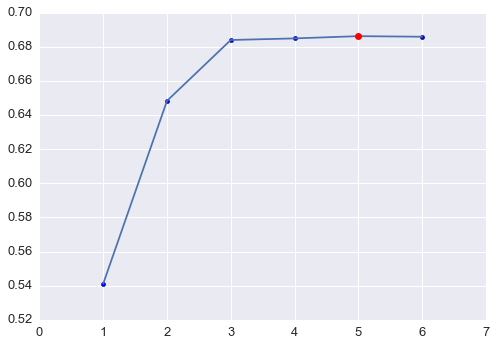

In [16]:

# Plotting Adjusted R-squre values:
plt.plot( range(1,len(all_feats)+1), [results[N].rsquared_adj for N in range(1,len(all_feats)+1)] )
plt.scatter( range(1,len(all_feats)+1), [results[N].rsquared_adj for N in range(1,len(all_feats)+1)] )

rsquared_adj_values=[results[N].rsquared_adj for N in range(1,len(all_feats)+1)] 
rsquared_adj_max=np.max(rsquared_adj_values)
rsquared_adj_max_index=np.argmax(rsquared_adj_values) +1 #Index start with 0, so add 1

plt.plot(rsquared_adj_max_index, rsquared_adj_max, 'o', c='red')


## Regularization

Instead of picking a subset of the features to keep in our model, we can constrain the coefficients of the features by adding a regularization term to the RSS function. Two ways of doing this are *ridge regression* and *lasso*. For ridge regression, we use an error function of the form
$$
RSS + \lambda \sum_{i=1}^n c_i^2 \,,
$$
where if $c_1, \ldots, c_n$ are the feature coefficients, and $\lambda$ is a constant. Since this term is small when the coefficients are small, it has the effect of restricting them and in this way controlling the variance. The value chosen for the parameter $\lambda$ is very important (the larger it is, the larger the penalty) -- we will return to this fact later, in order to choose this parameter systematically.

In [17]:
"""
We will create numpy arrays and normalize our data for use with sklearn methods.
"""
from sklearn.preprocessing import scale
y = train['MEDV'].values
train = train.drop('MEDV', axis=1)
X = train.values
X = scale( X, axis=0, with_mean=True, with_std=True ) # These are default parameters.

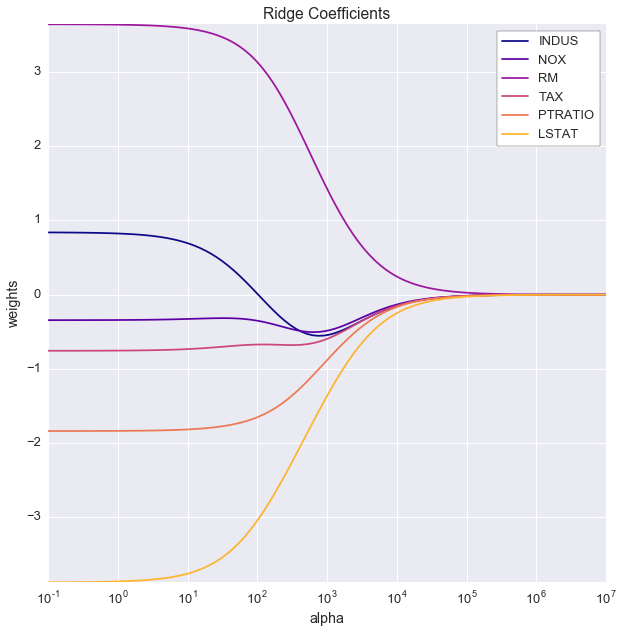

In [18]:
from sklearn.linear_model import Ridge
import matplotlib.cm as cm
import matplotlib.colors as colors

# Get 100 points between 10**-1 to 10**7 (use np's methods for this!)
### YOUR CODE STARTS HERE ###
n_alphas = 100
alphas = np.logspace(-1, 7, n_alphas)
### YOUR CODE ENDS HERE ###

# Get a Ridge regression model:
model = Ridge(fit_intercept=False)

# For each alpha, fit the model to the data, and save the coefficients (model.coef_)
# by pushing onto coefs list:
coefs = []
### YOUR CODE STARTS HERE ###
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
### YOUR CODE ENDS HERE ###

# We provide a mapping from the features to colors, 
# using the 'plasma' matplotlib color map.
# To use a color, do color=scalarMap.to_rgba(i),
# where i is the index of mapped feature inside ax.plot().
local_feats = list(train.columns.values)
cNorm = colors.Normalize(vmin=0, vmax=len(feats))
scalarMap = cm.ScalarMappable(norm=cNorm, cmap='plasma')

# For each feature, plot the saved coefficients vs alphas (on a log scale).
ax = plt.gca()
for i,feat in enumerate(local_feats):
    ### YOUR CODE STARTS HERE ###
    ax.plot(alphas, [coefs[k][i] for k in range(len(coefs))], label=feat, color=scalarMap.to_rgba(i))
    ### YOUR CODE ENDS HERE ###

# This may be useful for you to keep, but you may wish to rewrite to adapt to
# your own solution:

# Plot scale and tweaks:
ax.set_xscale('log')
plt.axis('tight')
fig = plt.gcf()
fig.set_size_inches(10, 10)

# Labels:
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge Coefficients')

# Make the legend readable by placing it well and coloring the background:
legend = ax.legend(frameon=1, loc='best')
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

plt.show()

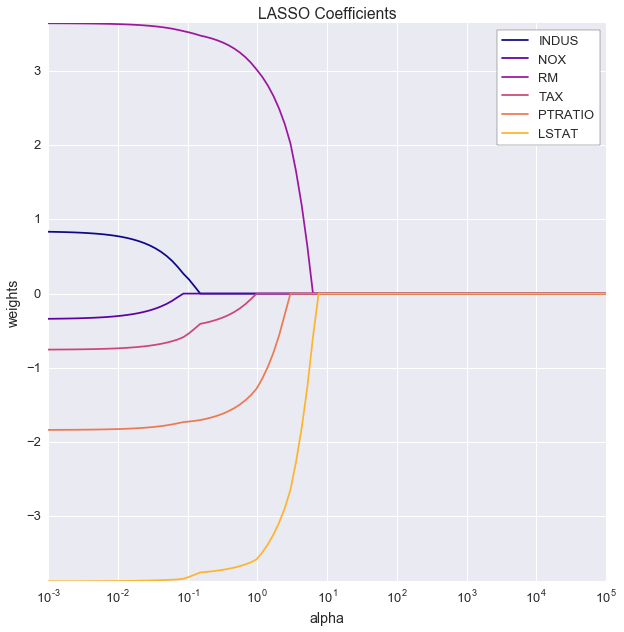

In [19]:
from sklearn.linear_model import Lasso
import matplotlib.cm as cm
import matplotlib.colors as colors

# Get 100 points between 10**-1 to 10**7 (use np's methods for this!)
### YOUR CODE STARTS HERE ###
n_alphas = 100
alphas = np.logspace(-3, 5, n_alphas)
### YOUR CODE ENDS HERE ###

# Get a Lasso regression model:
model = Lasso(fit_intercept=False)

# For each alpha, fit the model to the data, and save the coefficients (model.coef_)
# by pushing onto coefs list:
coefs = []
### YOUR CODE STARTS HERE ###
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
### YOUR CODE ENDS HERE ###

# We provide a mapping from the features to colors, 
# using the 'plasma' matplotlib color map.
# To use a color, do color=scalarMap.to_rgba(i),
# where i is the index of mapped feature inside ax.plot().
local_feats = list(train.columns.values)
cNorm = colors.Normalize(vmin=0, vmax=len(feats))
scalarMap = cm.ScalarMappable(norm=cNorm, cmap='plasma')

# For each feature, plot the saved coefficients vs alphas (on a log scale).
ax = plt.gca()
for i,feat in enumerate(local_feats):
    ### YOUR CODE STARTS HERE ###
    ax.plot(alphas, [coefs[k][i] for k in range(len(coefs))], label=feat, color=scalarMap.to_rgba(i))
    ### YOUR CODE ENDS HERE ###

# This may be useful for you to keep, but you may wish to rewrite to adapt to
# your own solution:

# Plot scale and tweaks:
ax.set_xscale('log')
plt.axis('tight')
fig = plt.gcf()
fig.set_size_inches(10, 10)

# Labels:
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LASSO Coefficients')

# Make the legend readable by placing it well and coloring the background:
legend = ax.legend(frameon=1, loc='best')
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.show()

In [20]:
results[3].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     291.9
Date:                Sun, 24 Jul 2016   Prob (F-statistic):          2.41e-100
Time:                        21:54:00   Log-Likelihood:                -1240.8
No. Observations:                 404   AIC:                             2490.
Df Residuals:                     400   BIC:                             2506.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     14.5881      4.300      3.393      0.001         6.136    23.041
RM             4.9331      0.472     10.442      0.000         4.004     5.862
PTRATIO       -0.8671      0.127     -6.805      0.000        -1.118    -0.617
LSTAT         -0.5671      0.047    -11.947      0.000        -0.660    -0.474
==============================================================================
Omnibus:                      156.506   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              766.010
Skew:                           1.611   Prob(JB):                    4.60e-167
Kurtosis:                       8.926   Cond. No.                         390.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

## Random forest regression

In [21]:
X = data.iloc[:, :-1].values
y = data['MEDV'].values

#X = bh_data.iloc[:, :-1].values
#y = bh_data['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score



forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print""
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))



MSE train: 1.933, test: 9.169

R^2 train: 0.978, test: 0.877


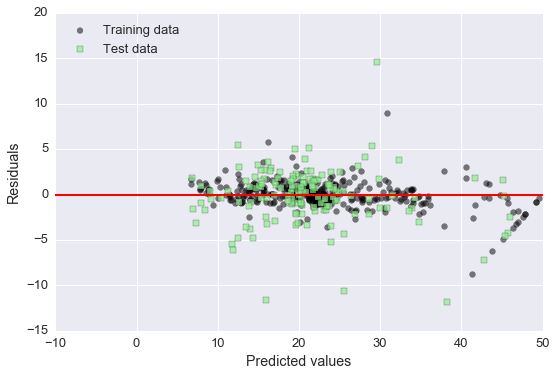

In [36]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='black', 
            marker='o', 
            s=35,
            alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='lightgreen', 
            marker='s', 
            s=35,
            alpha=0.7,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

<br>
<br>

...